In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [3]:
file_path = 'data_ pre_processing/data_merge.xlsx'

In [4]:
df = pd.read_excel(file_path)

In [5]:
df

,level_0,index,mssv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,...,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,tinhtrang,KhoaMH,namNhapHoc,soHocKy
0,0,12,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ENGL1113,ENGL1113.E11.CTTT,3,2013,1,4.5,1,...,Bình Định,CTTT2013,HTTT,CTTT,8,D480104,5,MHKT,2013,1
1,1,13,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ADENG1,ADENG1.E11.CTTT,0,2013,1,6.0,1,...,Bình Định,CTTT2013,HTTT,CTTT,8,D480104,5,KTMT,2013,1
2,2,14,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,CS1113,CS1113.E11.CTTT,4,2013,1,2.5,1,...,Bình Định,CTTT2013,HTTT,CTTT,8,D480104,5,HTTT,2013,1
3,3,15,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,MATH2144,MATH2144.E11.CTTT,4,2013,1,4.0,1,...,Bình Định,CTTT2013,HTTT,CTTT,8,D480104,5,HTTT,2013,1
4,4,16,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,SS001,SS001.E13,5,2013,1,5.0,1,...,Bình Định,CTTT2013,HTTT,CTTT,8,D480104,5,PĐTĐH,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,98911,101814,ACE14358XPvAibaEXe+MMervxP1vADM97U7CtAhJ,IT009,IT009.2016.1.M,2,2016,1,0.0,4,...,'Thành phố Hồ Chí Minh',HTTT0001,HTTT,CLC,11,D480104,1,PĐTĐH,2016,1
96265,98912,101815,ACE14358XPvAibaEXe+MMervxP1vADM97U7CtAhJ,IT001,IT001.2016.1.M,4,2016,1,0.0,4,...,'Thành phố Hồ Chí Minh',HTTT0001,HTTT,CLC,11,D480104,1,KHMT,2016,1
96266,98913,101816,ACE14358XPvAibaEXe+MMervxP1vADM97U7CtAhJ,PE001,PE001.2016.1.M,0,2016,1,0.0,4,...,'Thành phố Hồ Chí Minh',HTTT0001,HTTT,CLC,11,D480104,1,BMAV,2016,1
96267,98914,101817,ACE14358XPvAibaEXe+MMervxP1vADM97U7CtAhJ,PE002,PE002.2016.1.M,0,2016,1,0.0,4,...,'Thành phố Hồ Chí Minh',HTTT0001,HTTT,CLC,11,D480104,1,BMAV,2016,1


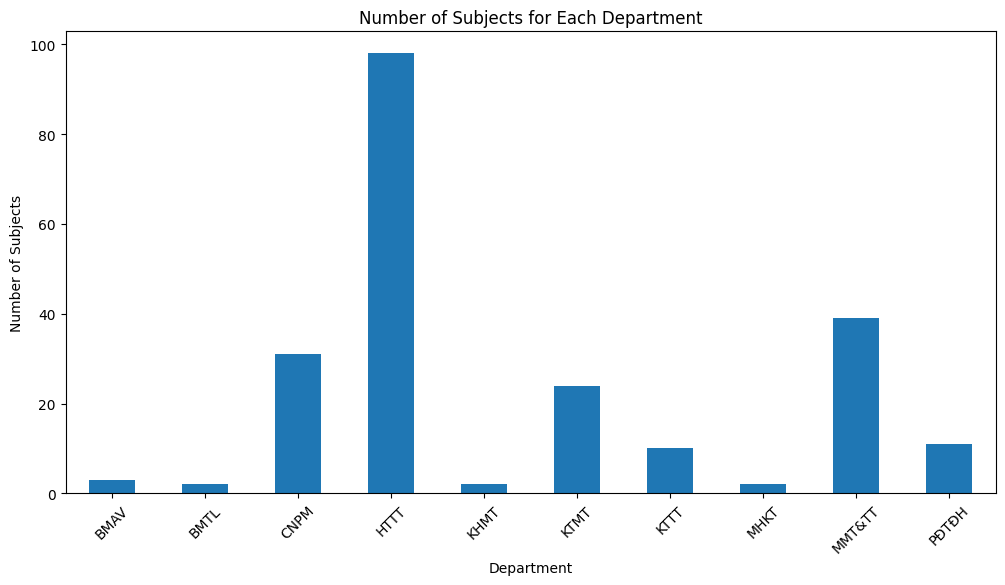

In [10]:
# Calculate the number of distinct subjects for each department
distinct_subjects = df.groupby('KhoaMH')['mamh'].nunique()

# Create a bar plot
plt.figure(figsize=(12, 6))
distinct_subjects.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Number of Subjects')
plt.title('Number of Subjects for Each Department')
plt.xticks(rotation=45)
plt.show()

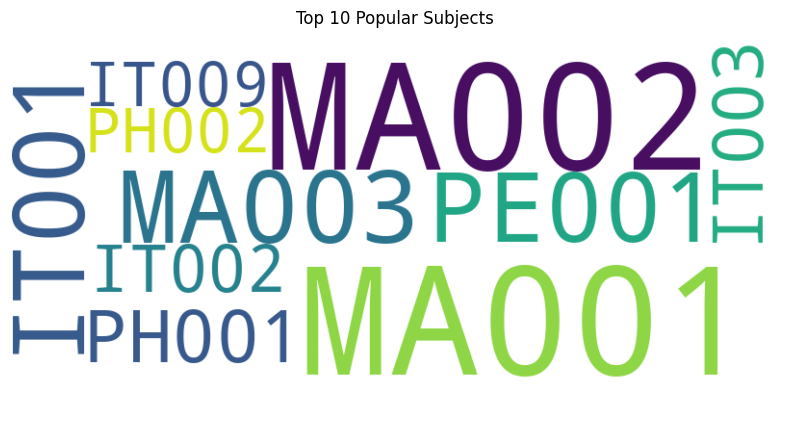

In [ ]:
# Calculate the count of students choosing each subject
subject_counts = df['mamh'].value_counts().head(10)

# Create a dictionary of subject counts
subject_counts_dict = subject_counts.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(subject_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Popular Subjects')
plt.show()

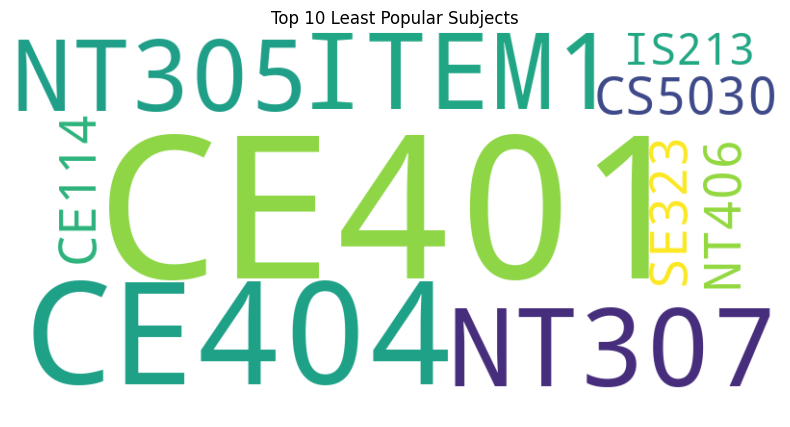

In [ ]:
# Calculate the count of students choosing each subject
subject_counts = df['mamh'].value_counts().tail(10)

# Create a dictionary of subject counts
subject_counts_dict = subject_counts.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(subject_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Least Popular Subjects')
plt.show()


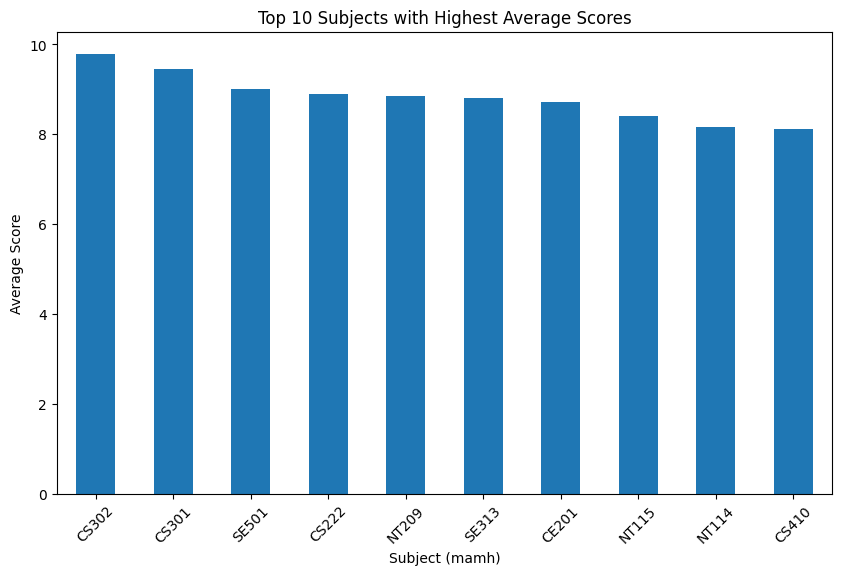

In [ ]:
# Filter out subjects with missing scores
filtered_df = df.dropna(subset=['diem'])

# Calculate average scores for each subject
subject_scores = filtered_df.groupby('mamh')['diem'].mean()

# Sort subjects by average score in descending order and select top 10
top_subjects = subject_scores.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_subjects.plot(kind='bar')
plt.xlabel('Subject (mamh)')
plt.ylabel('Average Score')
plt.title('Top 10 Subjects with Highest Average Scores')
plt.xticks(rotation=45)
plt.show()

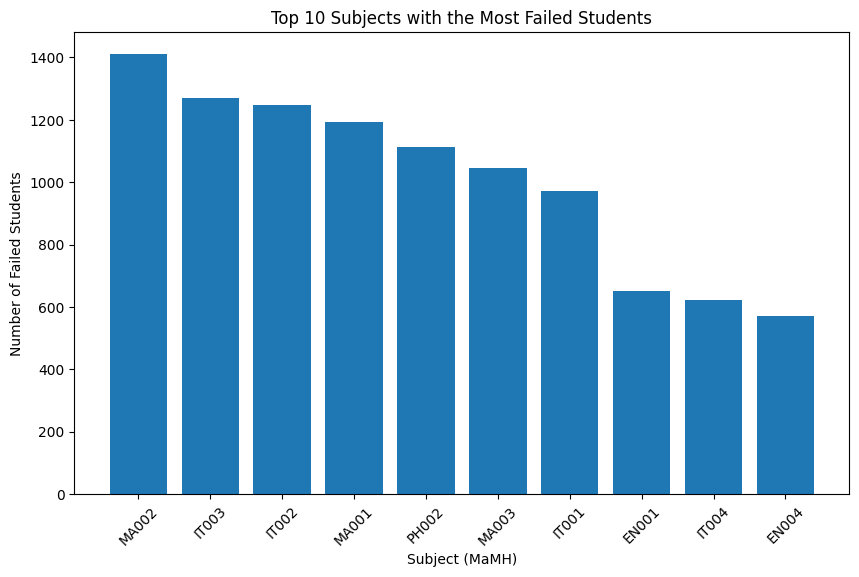

In [ ]:
# Filter the DataFrame for scores below 5
failed_subjects = df[df['diem'] < 5]

# Count the number of students for each subject
subject_counts = failed_subjects['mamh'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(subject_counts.index, subject_counts.values)
plt.xlabel("Subject (MaMH)")
plt.ylabel("Number of Failed Students")
plt.title("Top 10 Subjects with the Most Failed Students")
plt.xticks(rotation=45)
plt.show()

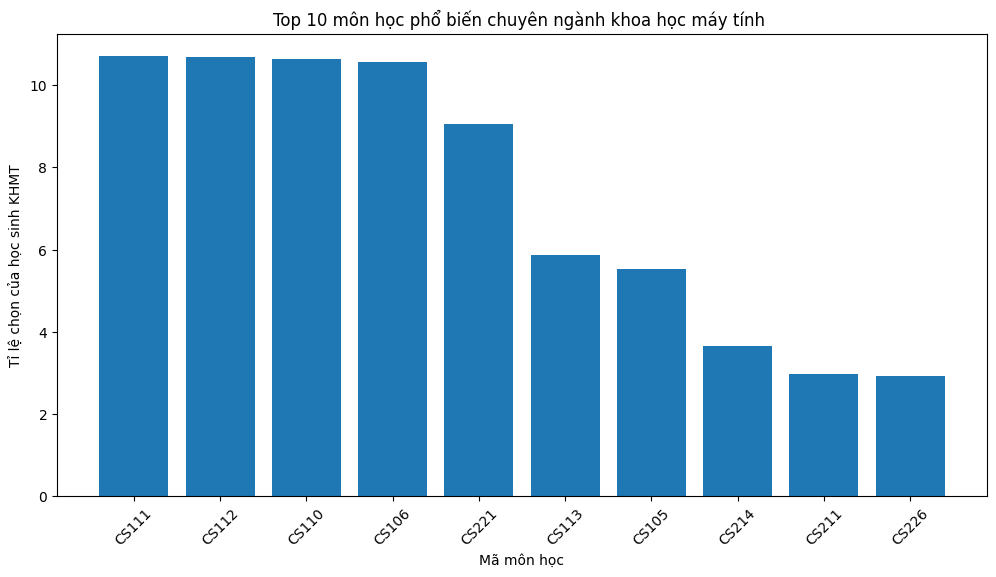

In [ ]:
# Filter data for Computer Science subjects with mamh starting with "CS"
cs_subjects = df[df['mamh'].str.match('^CS\d+$')]

# Filter data for Computer Science students from the Computer Science department
cs_students = cs_subjects[cs_subjects['khoa'] == 'KHMT']

# Calculate the count of students choosing each CS subject
cs_subject_counts = cs_students['mamh'].value_counts().head(10)

# Calculate the percentage of Computer Science students choosing each CS subject
cs_subject_percentages = (cs_subject_counts / len(cs_students)) * 100

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cs_subject_percentages.index, cs_subject_percentages.values)
plt.xlabel('Mã môn học')
plt.ylabel('Tỉ lệ chọn của học sinh KHMT')
plt.title('Top 10 môn học phổ biến chuyên ngành khoa học máy tính ')
plt.xticks(rotation=45)
plt.show()

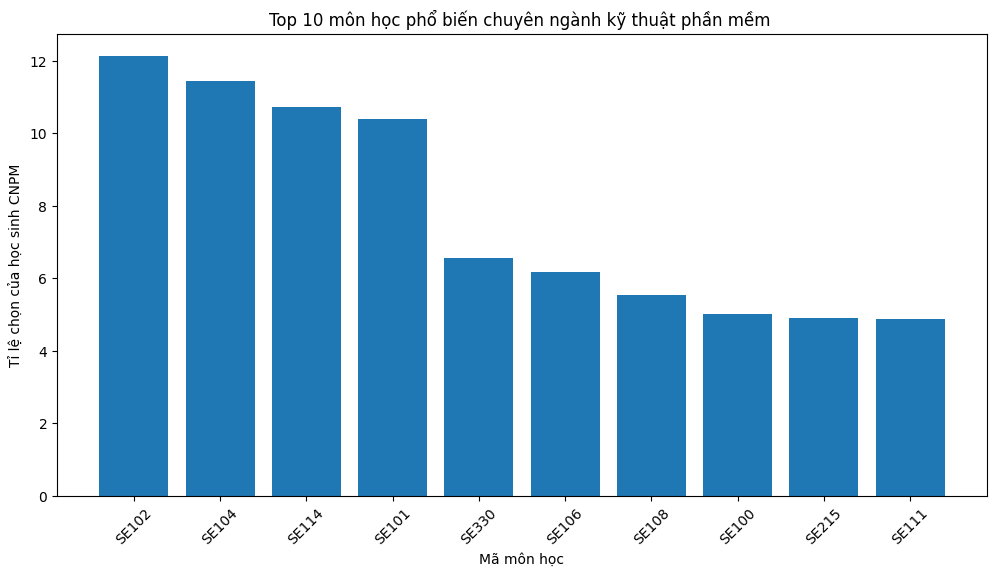

In [ ]:
# Filter data for Computer Science subjects with mamh starting with "CS"
cs_subjects = df[df['mamh'].str.match('^SE\d+$')]

# Filter data for Computer Science students from the Computer Science department
cs_students = cs_subjects[cs_subjects['khoa'] == 'CNPM']

# Calculate the count of students choosing each CS subject
cs_subject_counts = cs_students['mamh'].value_counts().head(10)

# Calculate the percentage of Computer Science students choosing each CS subject
cs_subject_percentages = (cs_subject_counts / len(cs_students)) * 100

# Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cs_subject_percentages.index, cs_subject_percentages.values)
plt.xlabel('Mã môn học')
plt.ylabel('Tỉ lệ chọn của học sinh CNPM')
plt.title('Top 10 môn học phổ biến chuyên ngành kỹ thuật phần mềm ')
plt.xticks(rotation=45)
plt.show()

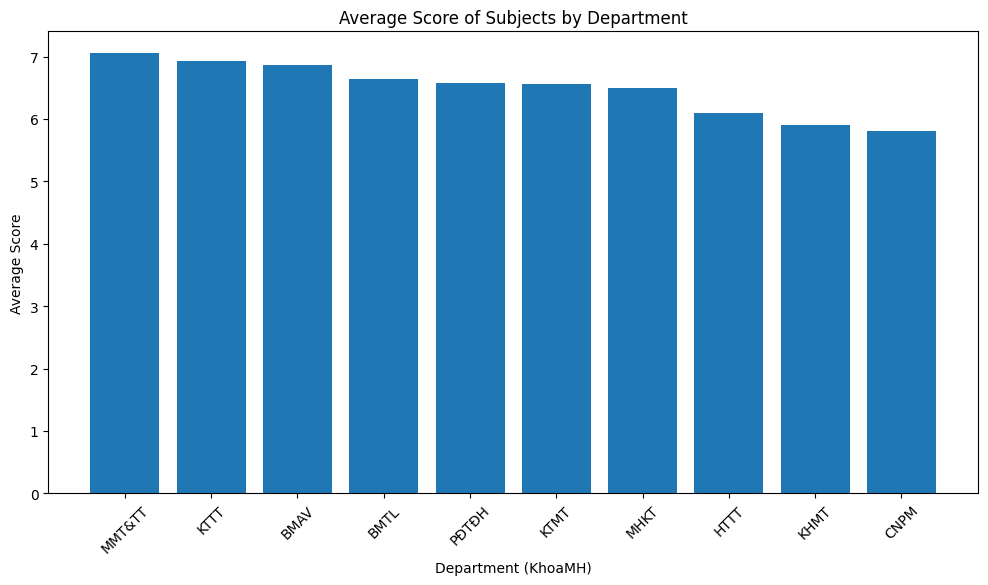

In [ ]:
# Calculate the average score for each department
department_avg_score = df.groupby('KhoaMH')['diem'].mean().reset_index()

# Sort departments by average score
department_avg_score = department_avg_score.sort_values(by='diem', ascending=False)

# Plot the average scores
plt.figure(figsize=(12, 6))
plt.bar(department_avg_score['KhoaMH'], department_avg_score['diem'])
plt.xlabel('Department (KhoaMH)')
plt.ylabel('Average Score')
plt.title('Average Score of Subjects by Department')
plt.xticks(rotation=45)
plt.show()

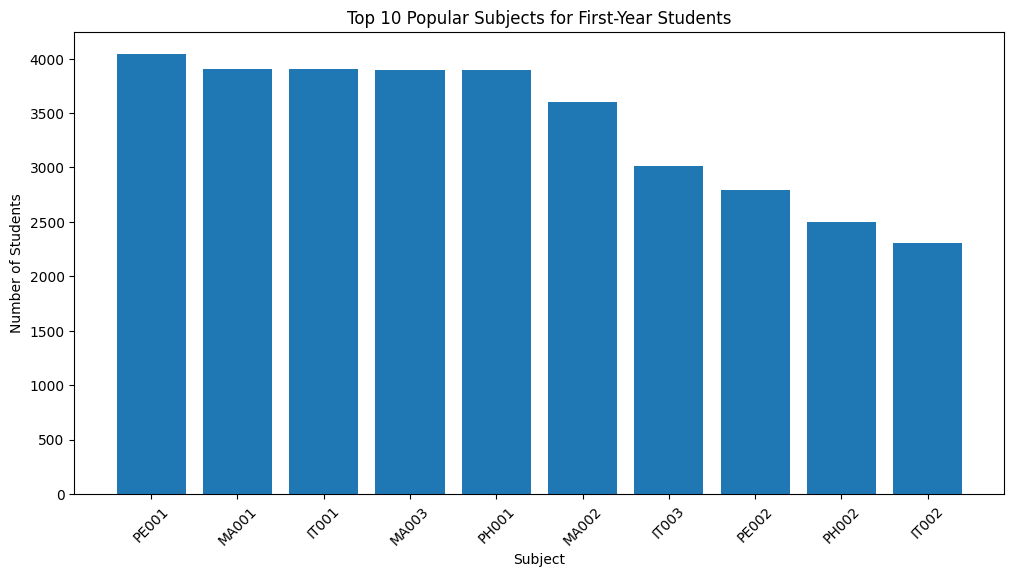

In [ ]:
# Calculate the year of study for first-year students
df['YearOfStudy'] = df['namhoc'] - df['namNhapHoc'] + 1

# Filter data for first-year students
first_year_df = df[df['YearOfStudy'] == 1]

# Count the number of students for each subject
subject_count = first_year_df['mamh'].value_counts().reset_index()
subject_count.columns = ['Subject', 'StudentCount']

# Select the top 10 popular subjects
top_10_subjects = subject_count.head(10)

# Plot the top 10 popular subjects
plt.figure(figsize=(12, 6))
plt.bar(top_10_subjects['Subject'], top_10_subjects['StudentCount'])
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.title('Top 10 Popular Subjects for First-Year Students')
plt.xticks(rotation=45)
plt.show()

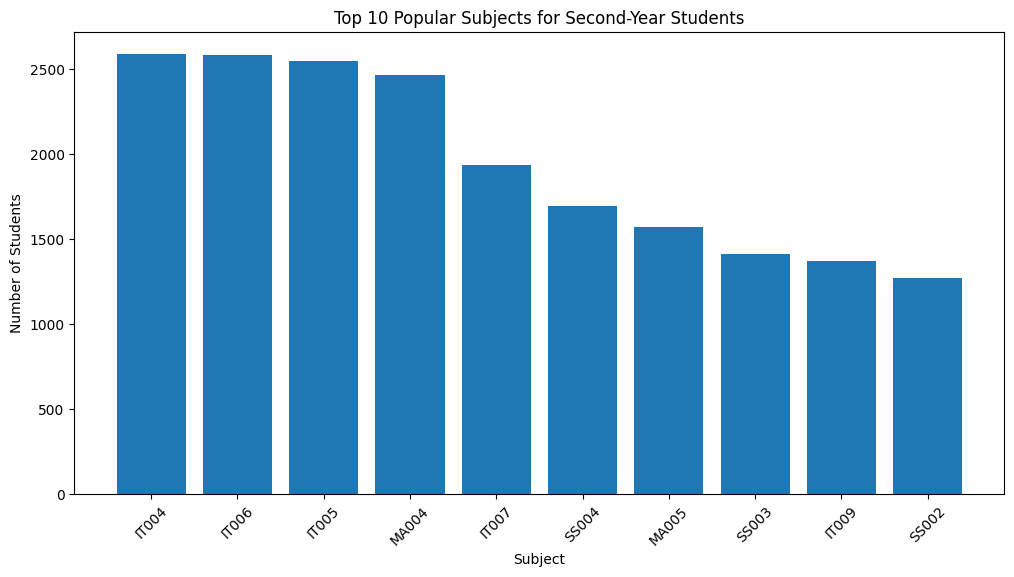

In [6]:
# Calculate the year of study for first-year students
df['YearOfStudy'] = df['namhoc'] - df['namNhapHoc'] + 1

# Filter data for first-year students
first_year_df = df[df['YearOfStudy'] == 2]

# Count the number of students for each subject
subject_count = first_year_df['mamh'].value_counts().reset_index()
subject_count.columns = ['Subject', 'StudentCount']

# Select the top 10 popular subjects
top_10_subjects = subject_count.head(10)

# Plot the top 10 popular subjects
plt.figure(figsize=(12, 6))
plt.bar(top_10_subjects['Subject'], top_10_subjects['StudentCount'])
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.title('Top 10 Popular Subjects for Second-Year Students')
plt.xticks(rotation=45)
plt.show()

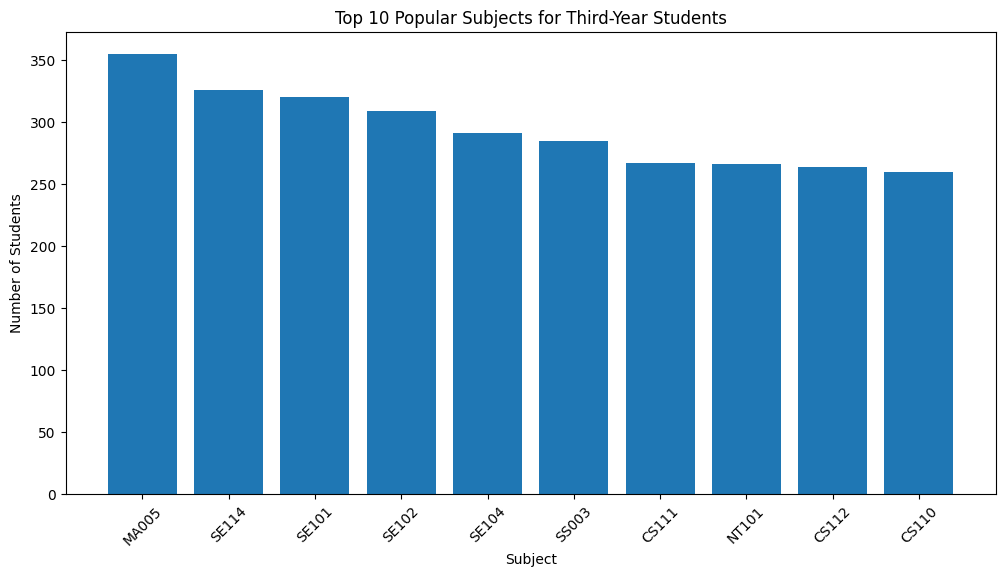

In [ ]:
# Calculate the year of study for first-year students
df['YearOfStudy'] = df['namhoc'] - df['namNhapHoc'] + 1

# Filter data for first-year students
first_year_df = df[df['YearOfStudy'] == 3]

# Count the number of students for each subject
subject_count = first_year_df['mamh'].value_counts().reset_index()
subject_count.columns = ['Subject', 'StudentCount']

# Select the top 10 popular subjects
top_10_subjects = subject_count.head(10)

# Plot the top 10 popular subjects
plt.figure(figsize=(12, 6))
plt.bar(top_10_subjects['Subject'], top_10_subjects['StudentCount'])
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.title('Top 10 Popular Subjects for Third-Year Students')
plt.xticks(rotation=45)
plt.show()

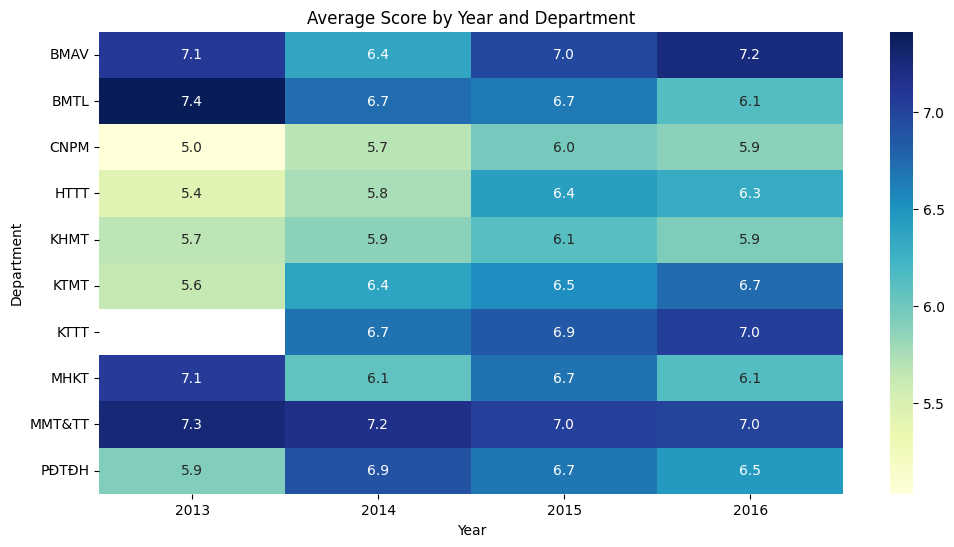

In [ ]:
import seaborn as sns

# Calculate the average score by year and department
average_score = df.groupby(['namhoc', 'KhoaMH'])['diem'].mean().reset_index()

# Pivot the data to have years as columns and departments as rows
pivot_table = average_score.pivot(index='KhoaMH', columns='namhoc', values='diem')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.xlabel('Year')
plt.ylabel('Department')
plt.title('Average Score by Year and Department')
plt.show()